In [ ]:
import os
import tensorflow as tf

In [ ]:
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)

In [ ]:
# strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
!gdown --id 1mymgIQxvdogufQNtbLLLltH_fZiJ8Jaf
#!gdown --id 1s_KOR3qxcOt1iVl6gVMkg0P-9tO5Ew0v

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1mymgIQxvdogufQNtbLLLltH_fZiJ8Jaf
To: /content/감정_분석용_데이터.csv
100% 18.9M/18.9M [00:00<00:00, 160MB/s]


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 4.9 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 6.6 MB 80.5 MB/s 
     |████████████████████████████████| 596 kB 53.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd

data_set = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', header=0, delimiter='\t' ,quoting=3)

In [ ]:
data_set.shape

(150000, 3)

In [ ]:
data_set['document'].nunique(), data_set['label'].nunique()

(146182, 2)

In [ ]:
data_set.drop_duplicates(subset=['document'], inplace=True) 

In [ ]:
data_set.dropna(inplace=True)

In [ ]:
X = data_set[['document']]
Y = data_set[['label']]

In [ ]:
# cond1 = (Y['감정']=='긍정')
# cond2 = (Y['감정']=='부정')
# cond3 = (Y['감정']=='중립')
# Y.loc[cond1] = 0
# Y.loc[cond2] = 1
# Y.loc[cond3] = 2

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(116945, 1)
(29237, 1)
(116945, 1)
(29237, 1)


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoConfig
config = AutoConfig.from_pretrained("klue/bert-base")
config.save_pretrained("bert-base")

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

In [ ]:
config

BertConfig {
  "_name_or_path": "klue/bert-base",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

In [ ]:
from transformers import BertTokenizerFast, BertModel

tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
train_x

,document
23572,잘 되길 바란다.
130872,"여자들만을 위한 영화, 7~8점이 적당"
6533,연애의 기술 보단 재밌음
26550,영화진짜 조끄이만들어났네 1시간30분내내시간낭비햇다이가 OOO들아 내마지막주말
18394,음..........
...,...
67803,나미아미타블 관세음보살 아멘
54444,단지 스타워즈여서 봤다.. 어이없는
10839,어렸을땐 그냥 충격적인 작품이였는데지금와서 그 가치를 알아보겠다.
50582,아이가재미있게잘보네요~~~


In [ ]:
train_y

,label
23572,0
130872,0
6533,0
26550,0
18394,1
...,...
67803,0
54444,0
10839,1
50582,1


In [ ]:
X_train_list = train_x['document'].tolist()
X_test_list = test_x['document'].tolist()
y_train = train_y['label'].tolist()
y_test = test_y['label'].tolist()

In [ ]:
X_train = tokenizer(X_train_list, padding=True)
X_test = tokenizer(X_test_list, padding=True)

In [ ]:
import tensorflow as tf

# 주어진 데이터소스를 여러 Tensor로 자른 후 iterator(반복가능 객체)로 만들기
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices([[1, 2], [3, 4]])
list(dataset.as_numpy_iterator())

[array([1, 2], dtype=int32), array([3, 4], dtype=int32)]

In [ ]:
dataset = tf.data.Dataset.range(8)
dataset = dataset.batch(3)
list(dataset.as_numpy_iterator())

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7])]

In [ ]:
example = val_dataset.take(1)
a = list(example.as_numpy_iterator())
a

[({'attention_mask': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
   'input_ids': array([    2,  7478,  2318,  1521,  3072,  2219,  3606,    18,  4530,
           2336,  2980,  6509, 15987,  2052,  1597,  2205,  2318,   723,
           2203,  2182,    18,    18,     3,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
  

In [ ]:
from transformers import TFBertForSequenceClassification

# def create_model():
#   model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=2, from_pt=True)
#   return model

model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=2, from_pt=True)

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# with strategy.scope():
#   model = create_model()
#   model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path) # 현재 경로 폴더 반환
checkpoint_dir

'training'

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.001,
    patience=3)

best_callback = ModelCheckpoint(filepath=checkpoint_path,
                                monitor="val_accuracy", 
                                save_weights_only=True,
                                verbose=1)

model.fit(
    train_dataset.batch(32), epochs=3, batch_size=32,
    validation_data = val_dataset.batch(32),
    callbacks = [best_callback])

# model.fit(
#     train_dataset.shuffle(10000).batch(32), epochs=5, batch_size=32,
#     validation_data = val_dataset.shuffle(10000).batch(32))

Epoch 1/3
3655/3655 [==============================] - ETA: 0s - loss: 0.2860 - accuracy: 0.8792
Epoch 1: saving model to training/cp.ckpt
3655/3655 [==============================] - 2115s 573ms/step - loss: 0.2860 - accuracy: 0.8792 - val_loss: 0.2776 - val_accuracy: 0.8867
Epoch 2/3
3655/3655 [==============================] - ETA: 0s - loss: 0.1857 - accuracy: 0.9273
Epoch 2: saving model to training/cp.ckpt
3655/3655 [==============================] - 2093s 573ms/step - loss: 0.1857 - accuracy: 0.9273 - val_loss: 0.2899 - val_accuracy: 0.8922
Epoch 3/3
3655/3655 [==============================] - ETA: 0s - loss: 0.1259 - accuracy: 0.9530
Epoch 3: saving model to training/cp.ckpt
3655/3655 [==============================] - 2093s 573ms/step - loss: 0.1259 - accuracy: 0.9530 - val_loss: 0.3802 - val_accuracy: 0.8892


In [ ]:
model.save_weights('emotion_model.ckpt')

In [ ]:
from transformers import TFBertForSequenceClassification

emotion_model = TFBertForSequenceClassification.from_pretrained("klue/bert-base",
                                                                num_labels=2,
                                                                from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import tensorflow as tf

emotion_model.load_weights('/content/training/checkpoint')

OSError: ignored

In [ ]:
from transformers import TextClassificationPipeline

loaded_tokenizer = BertTokenizerFast.from_pretrained('klue/bert-base')


def for_company_chat_bot_result(emotion_model):

  text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=emotion_model, 
    framework='tf',
    return_all_scores=True)

  list_customer_id = []
  customer_question = []
  customer_emotion = []

  while True:

    customer_id = str(input('고객님의 아이디를 입력해주세요 : '))
    print()

    print(f'고객님의 아이디가 {customer_id} 맞습니까?')

    print()
    confirmation = str(input('고객님의 아이디가 맞으면 yes / 아니면 no를 입력해주세요 : '))

    if confirmation == 'yes':
      list_customer_id.append(customer_id)
      break

    else:
      pass


  print()
  print('\n--------------------------------------------\n')
  print()
  print('Q & A 챗봇을 그만두고 싶을 경우 end를 입력해주세요!')
  print()

  while True:
    
    text = str(input('질문 사항을 입력해주세요. : '))
    print()

    if text == 'end':
      print()
      print(f'{customer_id}님 챗봇 서비스를 이용해주셔서 감사합니다')
      break
    
    customer_question.append(text)
    
    d = text_classifier(text)[0][0]
    p = text_classifier(text)[0][1]

    max_emotion = max(p['score'], d['score'])


    if max_emotion == p['score']:
      customer_emotion.append('positive')

    else: 
      customer_emotion.append('negative')

  list_customer_id = list_customer_id * len(customer_question)

  result_Q_A = pd.DataFrame(zip(list_customer_id, customer_question, customer_emotion))
  result_Q_A.columns = ['Customer_ID', 'Question', 'Coustomer_Emotion']

  return result_Q_A

In [ ]:
result_Q_A = for_company_chat_bot_result(emotion_model = model)

고객님의 아이디를 입력해주세요 : alpchcoo

고객님의 아이디가 alpchcoo 맞습니까?

고객님의 아이디가 맞으면 yes / 아니면 no를 입력해주세요 : no
고객님의 아이디를 입력해주세요 : alpaco

고객님의 아이디가 alpaco 맞습니까?

고객님의 아이디가 맞으면 yes / 아니면 no를 입력해주세요 : yes


--------------------------------------------


Q & A 챗봇을 그만두고 싶을 경우 end를 입력해주세요!

질문 사항을 입력해주세요. : 언제 배송되나요 빨리 배송해주세요

질문 사항을 입력해주세요. : 환불해주세요

질문 사항을 입력해주세요. : 다시는 주문 안할려구요

질문 사항을 입력해주세요. : 기사님이 친절하세요

질문 사항을 입력해주세요. : end


alpaco님 챗봇 서비스를 이용해주셔서 감사합니다


In [ ]:
result_Q_A

,Customer_ID,Question,Coustomer_Emotion
0,alpaco,언제 배송되나요 빨리 배송해주세요,positive
1,alpaco,환불해주세요,negative
2,alpaco,다시는 주문 안할려구요,negative
3,alpaco,기사님이 친절하세요,positive


In [ ]:
!pip install konlpy
!apt-get update -qq
!apt-get install fonts-nanum* -qq


from konlpy.tag import Okt
import seaborn as sns
from tqdm.notebook import tqdm
import re
from collections import Counter
from wordcloud import WordCloud
import cv2
from google.colab.patches import cv2_imshow



stop_words = ['하다', '이', '에', '도', '가', '쓰다', '은', '같다', '있다', '보다', '는', '자다', '되다', '써다', '아니다', '다', '오다', '왜', '캡', '을', '요', '않다', '를', '로',
             '제', '한', '하고', '다', '이건', '으로', '안', '만', '이다', '것', '시키다', '넣다', '력', '에서', '오다', '거', '고', '들', '이라', '저', '피실', '다른', '쓸다', '서',
             '나다', '의', '쿠팡', '후', '나', '중', '통', '에도', '되어다', '재다', '인데', '적', '라', '전', '새다', '늘', '대', '게', '네', '까지', '해보다', '걸', '개', '가다', '두',
             '과', '면', '없이' , '그', '나오다', '일', '마트', '인', '진짜', '또', '니', '부터', '빨', '예요', '부분', '헤봤다', '엄청', '형', '말', '어', '안나', '처럼', '뭐', '이에요',
              '지', '나서다', '반', '자주', '역시', '돼다', '따로' , '액', '와', '듯', '그레서', '상', '그래도', '년', '해', '때문', '보내다', '맘', '앞', '근데', '구', '싶다', '분', '로켓',
              '비', '이나', '대비', '늘다', '다시', '번', '수', '하나', '해주다', '일단' , '용', '시키다', '에는', '이번', '랑', '엔', '꾸다', '알다', '같이', '보고', '하', '아주']


okt=Okt()

def display_result(DataFrame):
  count = sns.countplot(data=DataFrame, x='Coustomer_Emotion', palette='Set3')

  texts = DataFrame['Question']

  lst_clean = []

  for text in tqdm(texts):
    lst_clean.append(re.sub("[^가-힣\\s]", "", text))

  text_token = []

  for text in tqdm(lst_clean):
    text_token.append(okt.morphs(text, stem=True))

  word_cloud = []

  for token_text in tqdm(text_token):
    word_cloud.extend([clean for clean in token_text if not clean in stop_words])

  word_count = Counter(word_cloud)

  wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
              background_color='white', width=200, height=200, max_words=10, max_font_size=200)
  wc.generate_from_frequencies(dict(word_count))
  wc.to_file("고객_질문_키워드.png")

  img = cv2.imread('고객_질문_키워드.png', cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 4.8 MB/s 
     |████████████████████████████████| 453 kB 71.9 MB/s 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (201

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

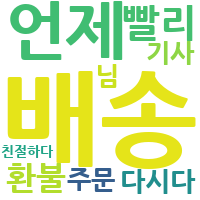

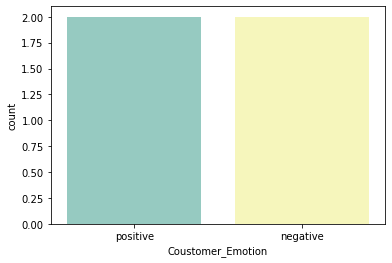

In [ ]:
display_result(result_Q_A)